In [5]:
from sklearn.datasets import make_blobs

# K-means clustering using scikit-learn

We start by creating 150 randomly generated points that are roughly grouped into three regions.

In [2]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

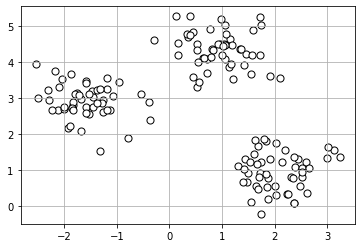

In [4]:
plt.scatter(X[:, 0], X[:, 1], c="white", marker="o", edgecolor="black", s=50)
plt.grid()
plt.show()

In [27]:
from sklearn.cluster import KMeans

# K-Means requires setting the number of clusters a-priori.
km = KMeans(
    n_clusters=3,
    init="random",  # replace with k-means++
    n_init=10,  # Run 10 times with different starting points.
    max_iter=300,
    tol=1e-4,
    random_state=0,
)
y_km = km.fit_predict(X)

In [28]:
import numpy as np

# Each points will be assigned to a numerical value, which refers to the cluster points.
np.unique(y_km)

array([0, 1, 2], dtype=int32)

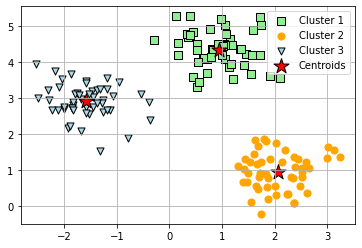

In [32]:
def plot_cluster(cluster, X):
    y = cluster.fit_predict(X)
    colors = ["lightgreen", "orange", "lightblue"]
    edgecolors = ["black", "orange", "black"]
    markers = list("sov")
    labels = [f"Cluster {i+1}" for i, _ in enumerate(np.unique(y))]

    for color, edgecolor, marker, label, y_km in zip(
        colors, edgecolors, markers, labels, np.unique(y)
    ):
        plt.scatter(
            X[y == y_km, 0],
            X[y == y_km, 1],
            s=50,
            c=color,
            marker=marker,
            edgecolor=edgecolor,
            label=label,
        )
    plt.scatter(
        km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250,
        marker="*",
        c="red",
        edgecolor="black",
        label="Centroids",
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()


plot_cluster(km, X)

## K-Means++

A smarter way of placing initial clusters centroids instead of random.

## Elbow method

Finding optimal number of clusters

In [17]:
print("Distortion: {:.2f}".format(km.inertia_))

Distortion: 72.48


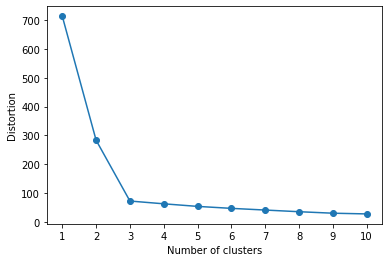

In [20]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.xticks(range(1, 11))
plt.ylabel("Distortion")
plt.show()

As `k` (number of clusters) increases, the distortion will decrease. The elbow is located at `k=3`.

## Silhoutte Analysis

Measure how tightly grouped the samples in the clusters are.

In [21]:
km = KMeans(
    n_clusters=3, init="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=0
)
y_km = km.fit_predict(X)

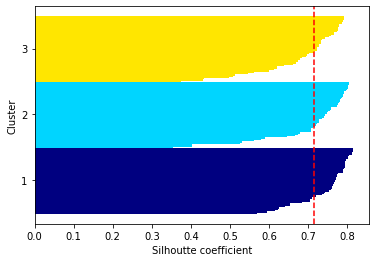

In [24]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhoutte coefficient")
plt.show()

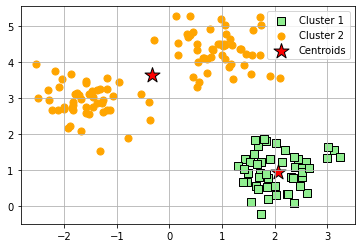

In [34]:
# K-Means requires setting the number of clusters a-priori.
km = KMeans(
    n_clusters=2,
    init="random",  # replace with k-means++
    n_init=10,  # Run 10 times with different starting points.
    max_iter=300,
    tol=1e-4,
    random_state=0,
)
y_km = km.fit_predict(X)
plot_cluster(km, X)

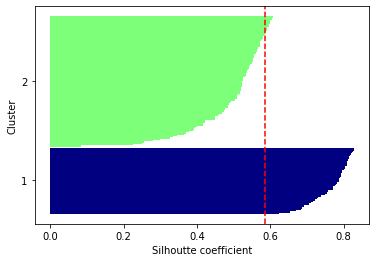

In [35]:

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhoutte coefficient")
plt.show()